# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

[Te proporcionamos algunos comentarios para guiar tu pensamiento mientras que completas este proyecto. Sin embargo, asegúrate de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de tus datos, explica los propósitos del proyecto y las acciones que planeas tomar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para hacer posibles nuevos pasos.]

# Análisis del precio de los coches

# Contenido
* [Introducción](#intro)
* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Descripción de los datos](#descripcion)


## Introducción <a id='intro'></a>
En este proyecto, nuestro trabajo será analizar los datos recopilados durante los últimos sobre anuncios de vehículos para determinar qué factores influyen en el precio de un vehículo. La(s) hipótesis específica(s) será(n) presentada(s) en el cuadro siguiente, y para el desarrollo del análisis se requerirá aplicar las diversas técnicas de preprocesamiento de datos y análisis exploratorio de los datos. Cada espacio de código incluye sus respectivos comentarios y documentación en caso fuera necesario para el adecuado entendimiento de la lógica de desarrollo del proyecto.

## Objetivos
Nuestro objetivo general es probar la siguiente hipótesis:
* Determinar qué factor (factores) impactan más sobre el precio de un vehículo


## Etapas
Debido a que no contamos con información sobre la calidad de los datos ni manera de obtener esa información, parte del tratamiento previo de datos y el EDA será realizado mediante el uso de las suposiciones más razonables y coherentes desde el punto de vista del analista. Para lograr eso, seguiremos el siguiente esquema general de análisis para este proyecto:

1. Descripción de los datos
2. Preprocesamiento de los datos
3. Análisis exploratorio de los datos
4. Prueba de la hipótesis

## Descripción de los datos <a id='descripcion'></a>

[Carga las librerías que crees que son necesarias para el proyecto. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Cargando las librerías pandas y matplotlib

### Cargar datos

[Carga los datos del proyecto y mira la información general.]

In [2]:
try:
    cars = pd.read_csv('vehicles_us.csv')
except:
    cars = pd.read_csv('/datasets/vehicles_us.csv')

# Cargando el archivo en el DataFrame "cars"

### Explorar datos iniciales

**Descripción de los datos**
El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

La documentación respectiva nos deja esta descripción de las columnas. Continuamos con el la parte exploratoria inicial observando la información y una muestra de nuestros datos:
[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [3]:
print(cars.describe())
print()
cars.info()
# imprime la información general/resumida sobre el DataFrame

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column     

In [4]:
cars.head(10)
# imprimir una muestra de datos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Del primer cuadro, podemos resaltar lo siguiente: 
* `price` tiene un valor mínimo de "1", su media y mediana están algo alejados. Posiblemente tengamos valores atípicos en esta columna.
* `model_year` está registrado como tipo flotante y su recuento varía respecto al total de filas. En este caso, tenemos valores ausentes.
* `model` no parece presentar problemas explícitos.
* `condition` no parece presentar problemas.
* `cylinders` es de tipo flotante y también tiene valores ausentes.
* `fuel` no parece presentar problemas.
* `odometer` es de tipo flotante, lo cual podría tener sentido al principio, pero luego notamos en la muestra que los datos no precisan de tener decimales. Esta cuestión será abordada pronto. También presenta valores ausentes.
* `transmission` no parece tener problemas.
* `type` no parece tener problemas más allá del uso de mayúsculas en algunos casos.
* `paint_color` tiene valores ausentes.
* `is_4wd` está registrado como valores flotantes, lo cual no es adecuado. Asimismo, tiene muchos valores ausentes y en su descripción parece solo existir el valor "1". En la muestra notamos que probablemente los valores "0" hayan sido registrados incorrectamente como valores ausentes.
* `date_posted` está registrado como tipo objeto, cuando en realidad es necesario que sea de tipo fecha para facilitar posibles análisis posteriores.
* `days_listed` no parece tener problemas. 

Por ahora, parece que nuestros valores ausentes tienen una ocurrencia aleatoria. De todas formas tomaremos cartas en el asunto: analizaremos estos problemas un poco más a detalle.  

[Describe lo que observas en la información general y la muestra de datos impresos. ¿Existe algún problema que pueda necesitar investigación y cambios adicionales?]

Dividiremos a nuestros datos para analizarlos por categoría: datos cuantitativos y datos categóricos.
Ya que en la primera parte del análisis ya obtuvimos algunas observaciones sobre los datos cuantitativos y sus distribuciones, analizaremos en este caso los datos categóricos, que son `model`, `condition`, `cylinders`, `fuel`, `transmission`, `type`, `paint_color` y `is_4wd`.

Al ser datos categóricos, una manera de analizar si sus valores están bien es obtener sus valores únicos. Automatizaremos este proceso:

[¿Hay columnas con tipos de datos inapropiados?]

In [5]:
cars_categorical = cars[['model', 'condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color', 'is_4wd']] # separamos las columnas categóricas
for column in cars_categorical:
    try: 
        print(f"Valores únicos en la columna '{column}':")   # muestra el nombre de cada columna
        print(cars_categorical[column].unique())        # muestra los valores únicos de cada columna
        print()
    except:
        print("Error al mostrar valores únicos columnas categóricas")

Valores únicos en la columna 'model':
['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f

Parece que nuestras columnas categóricas no presentan problemas en sus valores, solo el uso de 'SUV' en la columna "type", que luego procederemos a solucionar. Ahora necesitamos saber la distribución de los valores para cada columna, haciendo énfasis en las columnas con valores ausentes. También lo haremos usando un bucle:

In [6]:
for column in cars_categorical:
    try: 
        print(f"Distribución de valores de la columna '{column}':") 
        print(cars_categorical[column].value_counts(dropna=False, normalize=True))  # contando valores normalizados y con valores ausentes
        print()
    except:
        print("Error al mostrar la distribución de columnas categóricas")

Distribución de valores de la columna 'model':
ford f-150                           0.054265
chevrolet silverado 1500             0.042135
ram 1500                             0.033964
chevrolet silverado                  0.024668
jeep wrangler                        0.021718
                                       ...   
ford f-250 super duty                0.004677
acura tl                             0.004580
kia sorento                          0.004580
nissan murano                        0.004561
mercedes-benz benze sprinter 2500    0.000796
Name: model, Length: 100, dtype: float64

Distribución de valores de la columna 'condition':
excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64

Distribución de valores de la columna 'cylinders':
8.0     0.307501
6.0     0.304706
4.0     0.269073
NaN     0.102086
10.0    0.010655
5.0     0.005279
3.0     0.000660
12.0    0.000039
Na

Todas parecen distribuciones razonables. Tenemos tres columnas con valores ausentes:
* `cylinders`, en el cual, alrededor del 10 % de sus valores son ausentes. Estos valores ausentes podrían estar relacionados principalmente con el modelo del vehículo (`model`), así que tendremos que enfatizar el análisis con esta columna.
* `paint_color` tiene casi 18 % de valores ausentes, siendo casi tan frecuente como el color más frecuente de la columna ("White"). Sin duda, es una proporción muy alta de valores ausentes, así que este es un caso de especial atención. Estos valores ausentes podrían también estar relacionados con el modelo del vehículo (`model`), pero es difícil asegurar y probarlo.
* `is_4wd` tiene más del 50 % de sus datos ausentes, pero el sentido común (y tal como habíamos anticipado) nos obliga a deducir que estos valores ausentes en realidad se deben a un error bajo el cual al valor "0" se le procesó como "NaN". 

Para saber la proporción de valores ausentes en las columnas cuantitativas, que son `price`, `model_year`, `odometer` y `days_listed`, contaremos sus valores ausentes y obtendremos su respectiva proporción:

In [7]:
cars_cuantitative = cars[['price', 'model_year', 'odometer', 'days_listed']]    # dataset de columnas cuantitativas
for column in cars_cuantitative:
    try:
        print(f"Porcentaje de valores ausentes de la columna '{column}':")
        print(round(cars_cuantitative[column].isna().sum() / len(cars_cuantitative[column]), 4))  # obteniendo la suma de valores ausentes y dividiendo entre la longitud, redondeado con 4 decimales
        print() 
    except:
        print("Error al mostrar valores ausentes en columnas cuantitativas")

Porcentaje de valores ausentes de la columna 'price':
0.0

Porcentaje de valores ausentes de la columna 'model_year':
0.0702

Porcentaje de valores ausentes de la columna 'odometer':
0.1532

Porcentaje de valores ausentes de la columna 'days_listed':
0.0



`price` y `days_listed` no tienen datos ausentes. Mientras que `model_year` tiene un 7 % de valores ausentes y `odometer`, alrededor del 15 %. Continuamos.

### Exploración inicial de los valores ausentes
Ahora tenemos que analizar la influencia de los valores ausentes, es decir, si están distribuidos aleatoriamente o se pueden relacionar con alguna otra columna. Primero, no tendremos en cuenta a la columna `is_4wd`, porque ya conocemos la naturaleza de sus valores ausentes y eliminar más de la mitad de los valores puede distorsionar nuestros resultados: 

In [8]:
cars_without_4wd = cars.drop(['is_4wd'], axis=1)
cars_without_4wd.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'date_posted',
       'days_listed'],
      dtype='object')

Una vez obtenido este nuevo dataset, procedemos a analizar la distribución de las columnas del dataset con y sin valores ausentes de la siguiente manera:

**Datos originales**

In [9]:
for column in cars:
    print(f"Distribución de valores de '{column}':")
    print(cars[column].value_counts(dropna=False, normalize=True)) 
    print()

Distribución de valores de 'price':
1        0.015488
6995     0.013954
5995     0.012712
4995     0.012111
3500     0.012033
           ...   
58500    0.000019
3993     0.000019
32987    0.000019
3744     0.000019
7455     0.000019
Name: price, Length: 3443, dtype: float64

Distribución de valores de 'model_year':
NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
            ...   
1948.0    0.000019
1961.0    0.000019
1936.0    0.000019
1949.0    0.000019
1929.0    0.000019
Name: model_year, Length: 69, dtype: float64

Distribución de valores de 'model':
ford f-150                           0.054265
chevrolet silverado 1500             0.042135
ram 1500                             0.033964
chevrolet silverado                  0.024668
jeep wrangler                        0.021718
                                       ...   
ford f-250 super duty                0.004677
acura tl                             0.004580
kia sorento            

**Datos sin valores ausentes**

In [10]:
for column in cars_without_4wd:
    print(f"Distribución de valores de '{column}':")
    print(cars_without_4wd.dropna()[column].value_counts(dropna=False, normalize=True)) # eliminando los valores ausentes del dataset filtrado y obteniendo su distribución
    print()

Distribución de valores de 'price':
1        0.015544
6995     0.014173
5995     0.013571
3500     0.012201
4500     0.012101
           ...   
42970    0.000033
39608    0.000033
23976    0.000033
18958    0.000033
7455     0.000033
Name: price, Length: 2704, dtype: float64

Distribución de valores de 'model_year':
2013.0    0.072637
2012.0    0.072269
2011.0    0.071366
2014.0    0.071333
2015.0    0.068793
            ...   
1948.0    0.000033
1908.0    0.000033
1961.0    0.000033
1936.0    0.000033
1958.0    0.000033
Name: model_year, Length: 65, dtype: float64

Distribución de valores de 'model':
ford f-150                  0.055322
chevrolet silverado 1500    0.042018
ram 1500                    0.033828
chevrolet silverado         0.024903
jeep wrangler               0.020992
                              ...   
kia sorento                 0.004713
chrysler 200                0.004613
ford f-250 super duty       0.004312
acura tl                    0.004279
nissan murano        

Después de una revisión, no notamos diferencias notables en la distribución de las variables al considerar los valores ausentes. Es decir que muy probablemente nuestros valores ausentes tengan una distribución aleatoria y no se relacionen con los valores de las columnas.

[¿Hay valores ausentes en todas las columnas o solo en algunas? ¿Qué columnas contienen la mayor cantidad de valores ausentes? Describe brevemente lo que ves en 1 o 2 oraciones.]

### Conclusiones y siguientes pasos

Tenemos las siguientes conclusiones por ahora:
* Tenemos cinco columnas del dataset con valores ausentes, de los cuales pudimos detectar el origen de uno de ellos: `is_4wd`. En algunos casos, tenemos porcentajes de valores ausentes relativamente elevados y muy frecuentes.  
* Tenemos algunas columnas con sospechas de valores atípicos, que serán tratadas luego de solucionar los valores ausentes.
* Algunas de nuestras columnas están ingresadas con tipos de datos incorrectos o que no facilitarían un posible análisis posterior. El caso más especial es el de `date_posted`. Se abarcará este problema en el siguiente apartado.
* Es muy probable que nuestros valores ausentes tengan una ocurrencia aleatoria y tampoco tenemos información sobre la naturaleza de estos valores ausentes. Esto requeriría un análisis conjunto con las áreas respectivas encargadas, pero por ahora tendremos que ver la manera de tratar y solucionar estos valores ausentes en el siguiente apartado.


[Formula tus conclusiones sobre los datos iniciales. ¿Qué crees que se ve normal y qué no?]

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora. Específicamente, debe quedar claro qué parte de los datos deben tratarse para que sean más adecuados para el análisis requerido.]

# Preprocesamiento de los datos

## Tratar los valores ausentes 

**Valores ausentes de la columna `is_4wd`**

[Estudia los valores ausentes para cada columna en más detalle y decide qué hacer con ellos basándote en hipótesis significativas.]

Primero trataremos a esta columna debido a que logramos deducir la naturaleza de sus valores ausentes. Concluimos que los valores ausentes son en realidad valores "0" a los que por algún motivo se les terminó tratando de manera incorrecta. La alta incidencia de valores ausentes y la ausencia del valor "0" en un tipo de variable booleana nos condujo a esa conclusión. Entonces, realizaremos el cambio de los valores ausentes utilizando el método "fillna":

In [11]:
cars['is_4wd'] = cars['is_4wd'].fillna(0)   # cambiando NaN por 0

Comprobaremos si se realizó el cambio:

In [12]:
cars['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

**Valores ausentes de la columna `odometer`**

La columna `odometer` referida al kilometraje de los vehículos es una variable numérica o cuantitativa. Traeremos su descripción (distribución) para recordar sus principales características y estadísticos:

In [13]:
cars['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Esta columna presenta una relativamente gran desviación estándar y un valor máximo suficientemente elevado como para tirar de la media y que la mediana sea una medida más robusta (posiblemente hayan outliers). 
<br>Ahora, podemos preguntarnos qué variables pueden influir o ayudarnos a determinar el kilometraje. Desde el punto de vista del autor, parece razonable suponer que las columnas `model_year` (el año desde que fue lanzado un vehículo puede estar inversamente relacionado a su kilometraje: uno más reciente debería tener menos kilometraje) y `condition` (se esperaría que la condición de un vehículo esté inversamente relacionado con el kilometraje: se espera que uno en mejor condición tenga menos recorrido) pueden ayudarnos a agrupar y obtener información que usaremos al completar los valores ausentes de esta columna. Las demás variables no parecieran tener un efecto notable en esta columna. Dado esto, procedemos a agrupar mediante los criterios seleccionados y obtener la mediana:

In [14]:
cars_odometer = cars.groupby(['model_year', 'condition'])['odometer'].median()
cars_odometer.head(20)

model_year  condition
1908.0      excellent         NaN
            good         169328.0
1929.0      good              NaN
1936.0      excellent     30000.0
1948.0      like new       4000.0
1949.0      good           1800.0
1954.0      excellent      3565.0
1955.0      excellent     47180.0
1958.0      excellent      3184.0
            good          62799.0
1960.0      excellent     16000.0
            like new          NaN
1961.0      good          66000.0
1962.0      excellent     73637.0
            good              0.0
1963.0      excellent     40487.0
            fair              NaN
1964.0      excellent     35900.0
            good          96650.0
            like new     518500.0
Name: odometer, dtype: float64

Esta variable nueva agrupada nos debería servir para imputar los valores ausentes, aunque notamos que algunos años no cuentan con suficientes datos para generar una mediana con la agrupación dada. 

De todas formas, crearemos una función para rellenar los datos ausentes teniendo en cuenta esta agrupación y criterios:

In [15]:
def fillna_odometer(data):
    model_year = data['model_year']
    condition = data['condition']
    odometer = data['odometer']
    if pd.isna(odometer):
        try:
            return cars_odometer.loc[(model_year, condition)]
        except:
            return np.nan
    return odometer

Una vez creada la función, probaremos con un dataset ficticio si funciona correctamente o dentro de lo esperado:

In [16]:
data0 = {'model_year': [2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994., 2019., 2000., 2016.],
         'condition': ['good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new'],
          'odometer': [None, 50000, None, 20000, None, None, 90000, None, 10000, None, None, 45000, None, 20100, None, None, 35000, None, 120000, None]} # Creando el dataframe de prueba
data_test0 = pd.DataFrame(data0) # Creando el dataframe de prueba
data_test0['odometer'] = data_test0.apply(fillna_odometer, axis=1) # Comprobando si funciona
data_test0

,model_year,condition,odometer
0,2013.0,good,106375.0
1,2003.0,like new,50000.0
2,2017.0,fair,59800.0
3,2014.0,excellent,20000.0
4,2015.0,salvage,46000.0
5,2012.0,new,80147.0
6,2008.0,good,90000.0
7,2018.0,like new,18852.0
8,2009.0,fair,10000.0
9,2010.0,excellent,126000.0


Una vez probado que la función hace correctamente su trabajo, siempre con precaución debido a que probablemente haya casos donde la función no encuentre una mediana para reemplazar, seguimos con aplicar la función a la columna `odometer` y terminar de tratar a los valores ausentes:

In [17]:
cars['odometer'] = cars.apply(fillna_odometer, axis=1)

In [18]:
print(cars['odometer'].isna().sum())

556


Luego de aplicada la función, notamos que aún quedaron 556 filas con valores ausentes que no se pudieron tratar. Posiblemente se traten de casos únicos en donde nuestra función no logró encontrar un valor de mediana correspondiente en el DataFrame agrupado. De todas formas, de los casi 8 mil valores ausentes (que representaban más del 15 %), se logró reducir a 556, que representa un 1 % de los datos totales, una gran reducción de los valores ausentes.

Antes de decidir qué hacer con estos valores ausentes restantes, observaremos un poco sus valores:

In [19]:
cars[cars['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


En esta tabla filtrada podemos notar que los valores que no se lograron completar fueron debido a que nuestra columna `model_year` que utilizamos para completar `odometer` tiene algunos valores ausentes que no dejaron que nuestra función realice su trabajo completamente. Debido a que también necesitamos completar los valores de la columna `model_year` en el siguiente apartado, mantendremos estas filas para no distorsionar nuestros datos. Eliminar estas filas podría quitarnos información relevante que podría ser utilizada para rellenar datos de otras columnas. Por ahora, continuamos con `model_year`.

**Valores ausentes de la columna `model_year`**

Esta columna es cuantitativa o numérica. Para recordar tenemos su descripción (distribución) nuevamente:

In [20]:
cars['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Dado que se tratan de años, no podemos utilizar la media para completar los datos, porque perjudicaría nuestro análisis e interpretaciones. En cambio, usaremos la mediana, medida más robusta y acorde al tipo de datos que estamos manejando. 
<br>El año del modelo puede ser inferido o está relacionado principalmente con el modelo (debido a que hay modelos que salen por años) y la condición (un modelo en buena condición posiblemente sea uno más reciente, y su opuesto también es bastante razonable). Otra columna que podría estar relacionada es la del kilometraje (`odometer`), pero no es una variable categórica *per se* y complicaría el análisis. Las demás columnas no parecen tener una relación significativa, así que continuaremos con las seleccionadas. 
<br>Para obtener esto, agruparemos la mediana de `model_year` por `model` y `condition`:

In [21]:
cars_model_year = cars.groupby(['model', 'condition'])['model_year'].median()
cars_model_year.head(20)

model              condition
acura tl           excellent    2009.0
                   fair         2004.0
                   good         2007.0
                   like new     2007.0
bmw x5             excellent    2010.0
                   fair         2004.0
                   good         2006.0
                   like new     2009.0
buick enclave      excellent    2012.0
                   fair         2011.0
                   good         2011.0
                   like new     2015.0
cadillac escalade  excellent    2009.0
                   fair         2004.0
                   good         2007.0
                   like new     2012.0
                   salvage         NaN
chevrolet camaro   excellent    2013.0
                   fair         1995.0
                   good         2010.0
Name: model_year, dtype: float64

Una vez agrupado de acuerdo a lo requerido, crearemos una función que nos ayude a completar los valores ausentes:

In [22]:
def fillna_model_year(data):
    model = data['model']
    condition = data['condition']
    model_year = data['model_year']
    if pd.isna(model_year):
        try:
            return cars_model_year.loc[(model, condition)]
        except:
            return np.nan
    return model_year

Probaremos si la función creada 'funciona' correctamente:

In [23]:
data1 = {'model': ['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200', 'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento', 'chevrolet silverado 1500', 'honda accord', 'ram 1500', 'gmc yukon', 'jeep cherokee', 'chevrolet traverse', 'hyundai elantra', 'chevrolet tahoe', 'toyota rav4', 'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu'],
         'condition': ['good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new', 'fair', 'excellent', 'salvage', 'new', 'good', 'like new'],
          'model_year': [None, 2008, None, 2001, None, None, 2009, None, 2010, None, None, 2000, None, 2012, None, None, 2002, None, 1999, None]} # Creando el dataframe de prueba
data_test1 = pd.DataFrame(data1) # Creando el dataframe de prueba
data_test1['model_year'] = data_test1.apply(fillna_model_year, axis=1) # Comprobando si funciona
data_test1

,model,condition,model_year
0,bmw x5,good,2006.0
1,ford f-150,like new,2008.0
2,hyundai sonata,fair,2006.0
3,chrysler 200,excellent,2001.0
4,chrysler 300,salvage,NaN
5,toyota camry,new,2018.0
6,honda pilot,good,2009.0
7,kia sorento,like new,2014.0
8,chevrolet silverado 1500,fair,2010.0
9,honda accord,excellent,2010.0


Notemos que para el modelo "chrysler 300" no se pudo llenar el valor ausente ficticio creado, mientras que para los demás casos no hubo problemas. Esto puede ocurrir porque no encontró un valor en nuestro cuadro de medianas por modelo y la función utilizó el valor "np.nan", que devuelve el valor nulo. Lo comprobaremos realizando un "query" y las condiciones necesarias:

In [24]:
print(cars.query('model == "chrysler 300" and condition == "salvage"'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


Tal como se esperaba, el resultado nos devuelve un DataFrame vacío. Es decir, no existen valores para esa situación en específico para obtener la mediana y, por tanto, imputar los valores ausentes. Es posible que esta situación se repita en varios casos, pero deberíamos esperar que los valores ausentes en su mayoría sean llenados de manera satisfactoria. Entonces, dado que la función hace relativamente bien su trabajo, procedemos a aplicarla a la columna y comparar si aún existen valores ausentes:

In [25]:
cars['model_year'] = cars.apply(fillna_model_year, axis=1)  # aplicando la función a model_year

In [26]:
cars[cars['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Tenemos seis filas a las que la función no hizo efecto. Tal como demostramos arriba, estos son casos únicos y la función no puede tomar una mediana para completar los valores ausentes. Notamos que algunas filas también tienen valores ausentes en otras columnas. 

El hecho de que respecto al total de datos, estos seis datos representen un porcentaje mínimo y que también en algunas otras columnas contengan datos ausentes, hace tentativa la opción de eliminar estas filas. Entonces, la proporción y algunos detalles extra nos motivan a decidir prescindir de estas filas. Para hacerlo, usaremos el método ".dropna" y su parámetro "subset":

In [27]:
cars = cars.dropna(subset='model_year')

In [28]:
cars['model_year'].isna().sum()

0

Una vez procesada esta columna, podemos continuar con la siguiente, `cylinders`.

**Valores ausentes de la columna `cylinders`**

Esta columna tiene valores numéricos que en realidad son tratados como categóricos, debido a que son características de un vehículo y no se pueden realizar operaciones con sus valores porque no tendría sentido. Traeremos su descripción (distribución) para recordar y analizar qué hacer con sus valores ausentes:

In [29]:
cars['cylinders'].describe()

count    46260.000000
mean         6.125378
std          1.660309
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Tal como mencionamos, usaremos la mediana por la propia naturaleza de esta variable.

Ahora vale preguntarse qué otra columna podría ayudarnos a completar estos valores ausentes y un factor que resulta bastante razonable es el modelo: generalmente un modelo va asociado a un motor en concreto (y por tanto, a un número de cilindros del motor). Entonces, agruparemos en base al modelo para obtener la mediana correspondiente:

In [30]:
cars_cylinders = cars.groupby('model')['cylinders'].median()
cars_cylinders.head(15)

model
acura tl                         6.0
bmw x5                           6.0
buick enclave                    6.0
cadillac escalade                8.0
chevrolet camaro                 6.0
chevrolet camaro lt coupe 2d     6.0
chevrolet colorado               5.0
chevrolet corvette               8.0
chevrolet cruze                  4.0
chevrolet equinox                4.0
chevrolet impala                 6.0
chevrolet malibu                 4.0
chevrolet silverado              8.0
chevrolet silverado 1500         8.0
chevrolet silverado 1500 crew    8.0
Name: cylinders, dtype: float64

Ya que nuestra agrupación funciona correctamente, crearemos una función para llenar los valores ausentes de esta columna:

In [31]:
def fillna_cylinders(data):
    model = data['model']
    cylinders = data['cylinders']
    if pd.isna(cylinders):
        try:
            return cars_cylinders.loc[model]
        except:
            return np.nan
    return cylinders

Una vez creada la función, la probamos:

In [32]:
data2 = {'model': ['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200', 'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento', 'chevrolet silverado 1500', 'honda accord', 'ram 1500', 'gmc yukon', 'jeep cherokee', 'chevrolet traverse', 'hyundai elantra', 'chevrolet tahoe', 'toyota rav4', 'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu'],
         'cylinders': [None, 4., 8., None, 5., 10., 3., 12., None, 4., 8., None, 5., 10., 3., 12., 6., None, 8., None],} # Creando el dataframe de prueba
data_test2 = pd.DataFrame(data2) # Creando el dataframe de prueba
data_test2['cylinders'] = data_test2.apply(fillna_cylinders, axis=1) # Comprobando si funciona
data_test2

,model,cylinders
0,bmw x5,6.0
1,ford f-150,4.0
2,hyundai sonata,8.0
3,chrysler 200,4.0
4,chrysler 300,5.0
5,toyota camry,10.0
6,honda pilot,3.0
7,kia sorento,12.0
8,chevrolet silverado 1500,8.0
9,honda accord,4.0


Ahora la aplicamos y damos un vistazo si logró cumplir con su objetivo.

In [33]:
cars['cylinders'] = cars.apply(fillna_cylinders, axis=1)

In [34]:
cars['cylinders'].isna().sum()

0

Esta vez, no quedaron valores ausentes restantes luego de aplicar el criterio para completar los valores ausentes. Continuamos con la última columna que presenta valores ausentes por ahora.

**Valores ausentes de la columna `paint_color`**

Esta columna es completamente categórica y para recordar sus características la traeremos con el método "value_counts":

In [35]:
cars['paint_color'].value_counts(dropna=False)

white     10027
NaN        9266
black      7691
silver     6243
grey       5037
blue       4475
red        4421
green      1395
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Recordemos que esta columna presenta un relativo gran número de valores ausentes, sin embargo, no es fácil relacionar alguna característica u otra columna que nos ayude a agrupar y determinar algún estadístico para luego imputar los valores ausentes. Eso, agregado a que no podemos eliminar las filas porque podríamos caer en el error de sesgar nuestros resultados en otras columnas (porque estaríamos eliminando alrededor del 18 % de nuestros datos) y perder información que podría resultar valiosa.

Nuestra principal teoría o hipótesis acerca del origen de estos valores es que el dueño del vehículo prefirió no colocar el color de su vehículo, por cualquier motivo, y que la plataforma deja abierta la posibilidad de que los vendedores no coloquen el color de su vehículo. También posiblemente se trate de un error en los datos, pero no parece muy probable.

Por tanto, por el momento dejaremos a esta columna tal como está, por ahora, y continuaremos con la corrección de los datos en la sección siguiente.

**Conclusión**

Para la columna `is_4wd`, pudimos determinar la naturaleza de los valores ausentes y aplicamos la corrección necesaria. También pudimos agrupar y completar los datos de manera relativamente satisfactoria para las columnas `odometer` y `model_year`, así como también pudimos completar con éxito la columna `cylinders`. Pero tuvimos problemas para tratar los valores ausentes de la columna `paint_color`, debido a que no se relaciona con ninguna otra columna ni es fácil determinar qué factores determinan la compra de un color o no. 

Por ahora, continuaremos con las correciones de algunas columnas que mostraban datos incorrectos:

## Corregir los tipos de datos

En el primer apartado, habíamos observado que algunas columnas tenían tipos de datos incorrectos o que necesitan algún cambio para poder hacer su análisis más fácil. En este caso, empezaremos con la columna `date_posted`, columna que es más crítica respecto a este tema:

[Ya que los datos están más o menos completos ahora, corrige los tipos de datos si es necesario.]

**Corregir la columna `date_posted`**

Recordemos que esta columna está en el dataset como tipo objeto y necesita ser cambiado a tipo fecha, por tanto, haremos el cambio de formato:

In [36]:
cars['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [37]:
cars['date_posted'] = pd.to_datetime(cars['date_posted'], format='%Y-%m-%d')
cars['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

Una vez solucionado, pasamos a la columna `type`.

**Corregir la columna `type`**

Esta columna presentaba un valor en mayúsculas, lo cual podría obstaculizar nuestro trabajo posterior. Debido a eso, estandarizaremos sus valores llevándolos a minúsculas:

In [38]:
cars['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [39]:
cars['type'] = cars['type'].str.lower()
cars['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Una vez solucionada esta columna, pasamos a la columna `is_4wd`.

**Corregir la columna `is_4wd`**

En esta columna contamos con dos valores, siendo 1 (verdadero) para los vehículos que cuentan con tracción total o en las cuatro ruedas, y 0 (falso) para el caso contrario, vehículos de tracción trasera o en dos ruedas. Lo ideal sería que esta columna fuera de tipo booleano para facilitar la interpretación:

In [40]:
cars['is_4wd'].value_counts()

0.0    25951
1.0    25568
Name: is_4wd, dtype: int64

In [41]:
cars['is_4wd'] = cars['is_4wd'].astype('bool')
cars['is_4wd'].value_counts()

False    25951
True     25568
Name: is_4wd, dtype: int64

Una vez logrado, pasamos a la siguiente columna, `cylinders`.

**Corregir la columna `cylinders`**

Aunque en principio esta columna no pareciera necesitar cambios, recordemos que se trata de una variable que terminamos definiendo como categórica a pesar de sus aparentes valores numéricos. También es bueno tener en cuenta que los cilindros de un vehículo en general son números enteros, no flotantes. Entonces, cambiaremos a un tipo de valores que nos parece más coherente:

In [42]:
cars['cylinders'].head()

0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
Name: cylinders, dtype: float64

In [43]:
cars['cylinders'] = cars['cylinders'].astype('int')
cars['cylinders'].head()

0    6
1    6
2    4
3    8
4    4
Name: cylinders, dtype: int32

Por ahora, parece que los datos no necesitan más correcciones. Ahora analizaremos si existen valores duplicados en nuestra data.

**Corrigiendo valores duplicados (si es que los hay)**

En este caso, contaremos si existen filas duplicadas en nuestro DataFrame para analizarlos y tratarlos:

In [44]:
cars.duplicated().sum()

0

Parece que no tenemos valores duplicados en estos momentos. Por ahora, veremos nuevamente el resumen de nuestros datos y daremos conclusiones acerca del trabajo realizado por ahora.

In [45]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51519 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51519 non-null  int64         
 1   model_year    51519 non-null  float64       
 2   model         51519 non-null  object        
 3   condition     51519 non-null  object        
 4   cylinders     51519 non-null  int32         
 5   fuel          51519 non-null  object        
 6   odometer      50964 non-null  float64       
 7   transmission  51519 non-null  object        
 8   type          51519 non-null  object        
 9   paint_color   42253 non-null  object        
 10  is_4wd        51519 non-null  bool          
 11  date_posted   51519 non-null  datetime64[ns]
 12  days_listed   51519 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 5.0+ MB


**Conclusiones del apartado**

Hemos logrado corregir los datos de las columnas `date_posted`, `is_4wd`,`type` y `cylinders` de manera satisfactoria, logrando que sus datos estén acorde a lo esperado y que en el futuro nos facilite el análisis de los datos. También hemos analizado los valores duplicados y, por ahora, no los tenemos.

En nuestro vistazo a la información resumida de los datos podemos observar que los datos están corregidos, aunque es necesario ampliar el análisis. Para esto, en el siguiente apartado veremos qué información extra podemos agregar o extraer de nuestra data que nos pueda ser de utilidad antes de realizar el análisis exploratorio y luego probar nuestras hipótesis.

## Enriquecer datos

**Extrayendo valores de fecha de publicación del anuncio**

Un dato que será de utilidad para entender mejor nuestros datos es extraer las fechas. Se tiene en mente obtener la edad o tiempo de uso de los vehículos y su kilometraje promedio, para lo cual necesitaremos estos datos extraidos. De `date_posted`, usaremos los atributos que tiene como tipo "datetime" para obtener el día, mes y año respectivamente:

[Agrega factores adicionales a los datos para facilitar el análisis.]

In [46]:
cars['day_posted'] = cars['date_posted'].dt.day_name()  # extrae el nombre día de la semana y lo guarda en "day_posted"
cars['month_posted'] = cars['date_posted'].dt.month_name()  # extrae el nombre del mes y lo asigna a "month_posted"
cars['year_posted'] = cars['date_posted'].dt.year   # extrae el año y lo guarda en "year_posted"
cars.head()    # muestra las primeras cinco filas

# Agrega valores de fecha y hora para cuando se colocó el anuncio

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018
1,25500,2008.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


Una vez extraídos estos datos, obtendremos la "edad" del vehículo al momento que fue publicado.

**Obteniendo los años del vehículo**

La "edad" del vehículo puede ser un factor que determine el precio de venta de un vehículo, debido a eso es importante obtener esta información. Lo que haremos para tener este dato es restar el año que acabamos de obtener a el año del modelo, así tendremos una buena aproximación de los años de uso del vehículo:

In [47]:
cars['car_age'] = cars['year_posted'] - cars['model_year']
cars.head()

# Agrega los años del vehículo cuando el anuncio se colocó

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0
1,25500,2008.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0


Obtenido esta nueva columna, ahora podemos obtener otra nueva que nos indique el kilometraje promedio del vehículo por año.

**Obteniendo el millaje promedio del vehículo por año**

Una aproximación al uso que se le dio al vehículo, quizá de manera más precisa que la columna "condition", es obtener el kilometraje promedio que se le dio al vehículo por año. Esto también puede determinar el precio del vehículo y por eso el interés en obtener esta información. Para conseguir esta información, dividiremos la columna `odometer` sobre `car_age`:

In [48]:
cars['avg_yearly_mileage'] = cars['odometer'] / cars['car_age']
cars.head()

# Agrega el millaje promedio del vehículo por año

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


Aunque pareciera que esta nueva columna no tiene problemas, recordemos que en la columna `odometer` teníamos datos "especiales": valores nulos que no logramos completar totalmente y también valores con cero. También en la columna `car_age` recientemente creada pasa lo mismo, tenemos  ceros. Estos valores en algunos casos producirán errores en la nueva columna creada, así que trataremos de buscarlos:

In [49]:
cars['avg_yearly_mileage'].isna().sum()    # busca valores ausentes, debido a que una columna los tiene valores ausentes también

557

In [50]:
len(cars[cars['avg_yearly_mileage'] == np.inf])    # la división sobre cero crea indeterminados o infinitos, este código los busca

2151

Tal como habíamos previsto, tenemos muchos datos inciertos. Los valores ausentes podrían tener sentido si recordamos que teníamos esa misma cantidad de valores ausentes en la columna `odometer`. Habíamos determinado que estos valores ausentes contenían valores importantes en otras filas y quizá podrían sernos de utilidad. 
<br> En caso de los valores infinitos, echaremos un vistazo a sus filas para determinar qué hacer con estos valores.

In [51]:
cars[cars['avg_yearly_mileage'] == np.inf]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
19,13990,2018.0,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,Saturday,August,2018,0.0,inf
71,23300,2018.0,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,NaN,True,2018-10-13,36,Saturday,October,2018,0.0,inf
78,23800,2019.0,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,Thursday,February,2019,0.0,inf
99,39950,2018.0,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,NaN,True,2018-08-05,16,Sunday,August,2018,0.0,inf
106,21500,2019.0,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,Friday,March,2019,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8,gas,9446.0,automatic,truck,NaN,True,2018-05-06,39,Sunday,May,2018,0.0,inf
51442,28990,2018.0,ford f150,excellent,8,gas,10152.0,automatic,truck,white,True,2018-06-13,47,Wednesday,June,2018,0.0,inf
51446,15999,2018.0,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,Saturday,July,2018,0.0,inf
51447,33990,2019.0,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,True,2019-01-25,36,Friday,January,2019,0.0,inf


Parece claro notar que los infinitos se debieron a una división sobre cero: son autos de muy reciente modelo y publicación, con una edad de cero. La solución sería simplemente pasar sus valores de kilometraje a la columna nueva, ya que ese sería su valor medio de millaje. Para hacerlo, crearemos una función que nos ayude a completar estos valores infinitos con el valor de `odometer` (tengamos en cuenta que de todas formas estos valores son outliers y se tendrán que tratar en el análisis exploratorio de los datos).

In [52]:
def fillinf_avg(data):
    odometer = data['odometer']
    avg_yearly_mileage = data['avg_yearly_mileage']
    if avg_yearly_mileage == np.inf:
        try:
            return odometer
        except:
            return np.nan
    return avg_yearly_mileage

Para probar nuestra función, crearemos un pequeño DataFrame con los datos requeridos:

In [53]:
data3 = {'odometer': [31932.0, 27493.0, 10899.0, 18500.0, 16168.0],
         'avg_yearly_mileage': [np.inf, 35000, np.inf, np.inf, 50000],} # Creando el dataframe de prueba
data_test3 = pd.DataFrame(data3) # Creando el dataframe de prueba
data_test3['avg_yearly_mileage'] = data_test3.apply(fillinf_avg, axis=1) # Comprobando si funciona
data_test3

,odometer,avg_yearly_mileage
0,31932.0,31932.0
1,27493.0,35000.0
2,10899.0,10899.0
3,18500.0,18500.0
4,16168.0,50000.0


Ahora procedemos a aplicarlo en nuestro DataFrame:

In [54]:
cars['avg_yearly_mileage'] = cars.apply(fillinf_avg, axis=1)

In [55]:
cars[cars['avg_yearly_mileage'] == np.inf]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage


Se puede decir que estos casos se lograron solucionar. Para continuar, lo que nos faltaría es cambiar la columna `condition` por valores más manipulables. 

**Cambiando los valores de `condition`**

Para agilizar el análisis, posiblemente nos sea de utilidad cambiar las categorías hacia números enteros bajo una clasificación numérica. Los detalles o la guía del cambio de los valores serán de la siguiente manera:

* new = 5
* like new = 4
* excellent = 3
* good = 2
* fair = 1
* salvage = 0

Para realizar el cambio, usaremos el método "where()".

In [56]:
cars['condition'] = cars['condition'].where(cars['condition'] != 'salvage', 0)
cars['condition'] = cars['condition'].where(cars['condition'] != 'fair', 1)
cars['condition'] = cars['condition'].where(cars['condition'] != 'good', 2)
cars['condition'] = cars['condition'].where(cars['condition'] != 'excellent', 3)
cars['condition'] = cars['condition'].where(cars['condition'] != 'like new', 4)
cars['condition'] = cars['condition'].where(cars['condition'] != 'new', 5)
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

In [57]:
cars['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=object)

Notamos que se guardaron como tipo objeto, cuando son datos de tipo numérico. Procedemos a solucionar este detalle:

In [58]:
cars['condition'] = cars['condition'].astype('int')
cars['condition'].unique()

array([2, 4, 1, 3, 0, 5])

**Conclusión**

Debido a que probaremos ciertas hipótesis, necesitábamos obtener información extra como los días, meses, años, edad del vehículo y kilometraje promedio, así como cambiar una columna categórica para clasificarla mejor. Logramos realizar todo el proceso de manera satisfactoria, solo con el detalle de ciertos valores ausentes en la columna `avg_yearly_mileage`. Ahora echaremos un último vistazo a nuestro DataFrame y su información, para comprobar el trabajo realizado y podamos pasar al análisis exploratorio de los datos.

## Comprobar datos limpios

Para empezar ya con el análisis exploratorio de los datos, daremos una revisión rápida al dataset final con el que terminamos luego del preprocesamiento de los datos. 

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [59]:
cars.info()

# imprime la información general/resumida sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51519 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51519 non-null  int64         
 1   model_year          51519 non-null  float64       
 2   model               51519 non-null  object        
 3   condition           51519 non-null  int32         
 4   cylinders           51519 non-null  int32         
 5   fuel                51519 non-null  object        
 6   odometer            50964 non-null  float64       
 7   transmission        51519 non-null  object        
 8   type                51519 non-null  object        
 9   paint_color         42253 non-null  object        
 10  is_4wd              51519 non-null  bool          
 11  date_posted         51519 non-null  datetime64[ns]
 12  days_listed         51519 non-null  int64         
 13  day_posted          51519 non-null  object    

In [60]:
cars.head()

# imprimir una muestra de datos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


Un resumen rápido: completamos los valores ausentes posibles, eliminamos algunos en base a una columna y no pudimos hacer mucho con los de la columna `paint_color`, en el cual tenemos el principal porcentaje de ausentes. Luego, cambiamos y corregimos los tipos de datos de algunas columnas. Finalmente, agregamos información relevante en nuevas columnas para enriquecer el análisis y facilitar la prueba de la hipótesis. Ahora abordaremos el análisis exploratorio de los datos, estudiando cada variable y sus características.

# EDA: Análisis exploratorio de los datos

## Estudiar parámetros principales

Nuestro análisis exploratorio tratará de buscar y corregir valores y datos de las columnas que nos ayuden a probar nuestra hipótesis, ante lo cual nos preguntamos, ¿qué factores podrían determinar el precio de un vehículo? De manera tentativa y en base a nuestro dataset, proponemos cinco principales factores o parámetros a estudiar:

* Precio
* Edad del vehículo (en el momento que fue anunciado)
* Millaje
* (Número de) cilindros
* Estado del vehículo 

En nuestro DataFrame, estos parámetros corresponden a las siguientes columnas: `price`, `car_age`, `odometer`, `cylinders` y `condition`. Las primeras tres columnas son numéricas, mientras que las dos restantes son categóricas. Tendremos en cuenta estos tipos de datos al momento de graficar estas variables.

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

In [61]:
def hist_cuantitative(data, column, bins_number=50, x_axis=(0,0)):
    data.plot(y=column, kind='hist', bins=bins_number, title=column, xlabel=column, ylabel='Frecuency', xlim=x_axis, grid=True)
    plt.show()

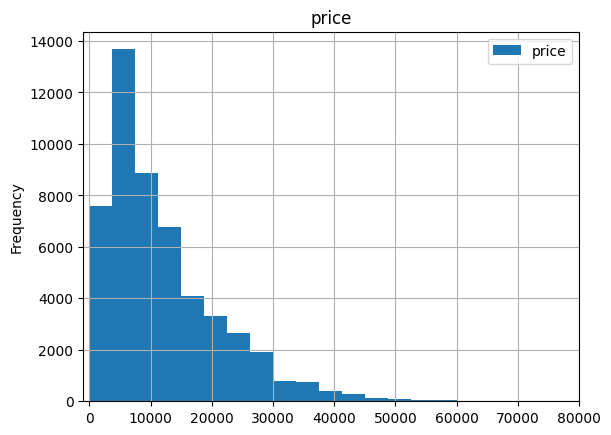

In [62]:
hist_cuantitative(cars, 'price', bins_number=100, x_axis=(-1000, 80000))

Para esta columna, notamos que tenemos un pico de entre unos 5 mil a 7 mil unidades monetarias. Es curioso que existan valores cercanos a cero, posiblemente relacionado a vehículos muy usados o en los que el vendedor no puso el precio de manera explícita. Para el otro lado de la distribución, notamos que los valores tienen un comportamiento esperado: empiezan a decrecer hasta aproximadamente los 50 mil unidades monetarias, donde a partir de ahí ya son casos aislados con comportamiento de atípicos, que posiblemente sean valores que estén distorsionando la media. 

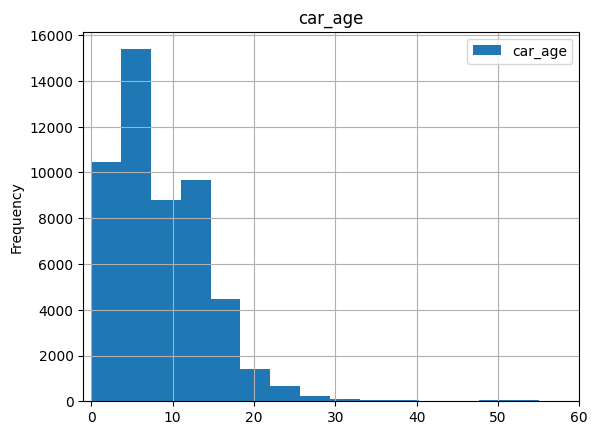

In [63]:
hist_cuantitative(cars, 'car_age', bins_number=30, x_axis=(-1, 60))

Esta variable también tiene un comportamiento esperado: un grupo de carros bastante recientes, donde la mayoría parece tener 5 años de antiguedad, valor del cual empieza a disminuir progresivamente hasta los 30 años, desde donde ya podríamos considerar a los demás valores de outliers y que posiblemente distorsionan nuestros estadísticos.

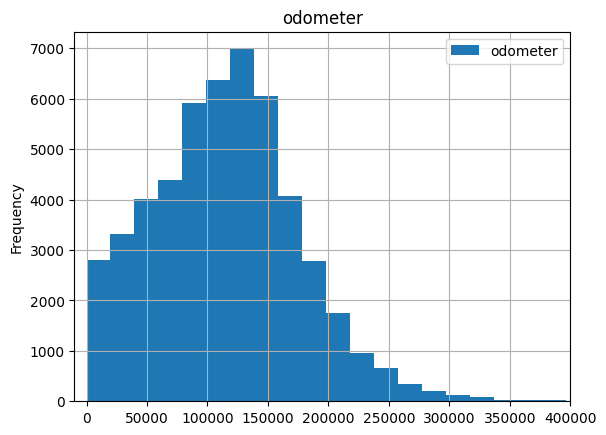

In [64]:
hist_cuantitative(cars, 'odometer', x_axis=(-10000, 400000))

También esta columna presenta un comportamiento esperado o aproximándose a una distribución normal: empezamos con una cierta gran cantidad de valores cercanos a cero (coherente a carros muy recientes, que también mostraba un comportamiento parecido), un pico de alrededor de 120 mil millas (o kilómetros, no sabemos la unidad de medida, por cierto), y una caída gradual hasta tener valores escasos a partir de las 350 mil millas, donde se pueden considerar a los valores a partir de ahí como atípicos.

Algo a notar es que la distribución es ciertamente asimétrica, donde se acumulan más valores cercanos a cero, tal como en la columna `price`. Es posible que este comportamiento tenga las mismas causas subyacentes que la columna `price`. Esperamos demostrar esta teoría en los siguientes apartados.

In [65]:
def bar_cualitative(data, column):
    data[column].value_counts().plot(kind='bar', title=column, xlabel=column, ylabel='Frecuency', grid=True, rot=0)
    plt.show()

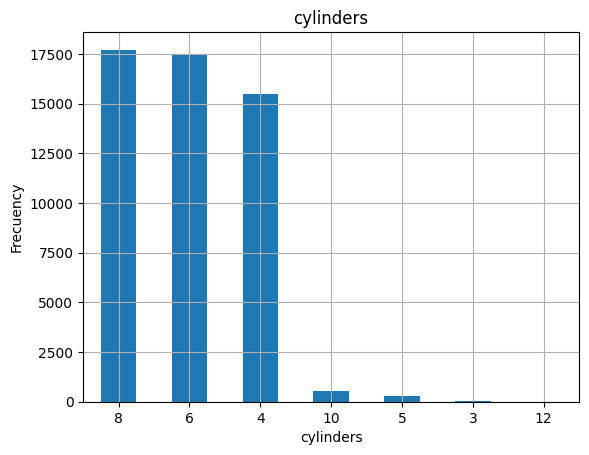

In [66]:
bar_cualitative(cars, 'cylinders')

Acá podemos notar que la mayor parte de los vehículos en nuestro dataset son de 8, 6 y 4 cilindros, respectivamente. Mientras que vehículos con 10 y 12 cilindros se asocian a unos muy caros (y por ende, escasos), así como vehículos con un número impar de cilindros, como 5 y 3, los cuales no parecen ser muy comunes y/o comerciales. 

Vale recordar que en general los motores de 8 y 6 cilindros ya se relacionan con vehículos de alto rendimiento y relativamente caros respecto al promedio. Se podría decir entonces que nuestro sitio web de venta de vehículos tiene un enfoque o está siendo usada para vender este tipo de vehículos en general, así como probablemente estos sean los vehículos más buscados en nuestra página web e internet, o por último, que nuestra página funcione un lugar (país) con un relativo alto poder adquisitivo.

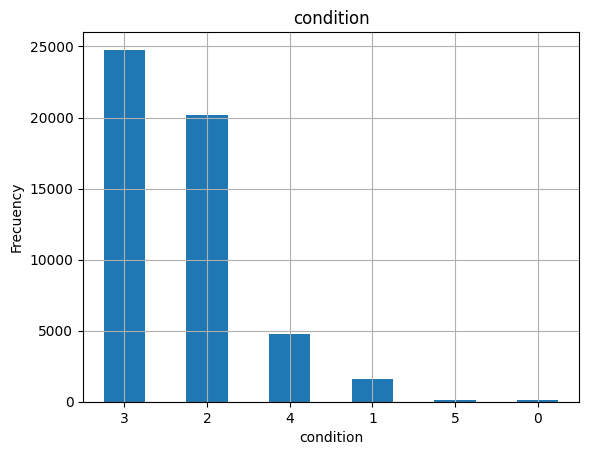

In [67]:
bar_cualitative(cars, 'condition')

Nuestro gráfico acá nos muestra que la mayor parte de los vehículos anunciado están en una condición de "excellent" (excelente, en español), seguido de "good" (bueno). Entre estas dos condiciones de los vehículos son las más frecuentes, al que siguen "like new" (como nuevo), "fair" (bastante, regular, aceptable), "new" (nuevo) y "salvage" (para rescate) respectivamente. Destacamos últimamente que "new" y "salvage" son las categorías menos frecuentes del dataset (por mucho).

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

Para ayudarnos a determinar los valores atípicos, aparte de los histogramas, usaremos los gráficos de caja para tener más certeza de nuestras conclusiones y decisiones. Los gráficos de caja son especialmente útiles en las columnas `price`, `car_age` y `odometer` de valores cuantitativos y notoria presencia de una agrupación de datos hacia el cero de manera irregular, así como valores muy altos que perjudican nuestro análisis. En este apartado trataremos de determinar los límites de estos valores atípicos para finalmente obtener un nuevo dataset limpio para la prueba de hipótesis.

Para automatizar el proceso, crearemos una función que grafique nuestros gráficos de caja y los límites teóricos de la distribución que determinan los valores atípicos:

In [68]:
def graph_boxplots(data, column, y_axis=(0,0)):
    Q1 = data[column].quantile(0.25)    # obtiene el primer cuartil
    Q3 = data[column].quantile(0.75)    # obtiene el tercer cuartil
    IQR = Q3 - Q1   # obtiene el rango intercuartílico
    
    data.boxplot(column)    # función que grafica
    plt.ylim(y_axis)    # límites del gráfico de caja
    plt.title(column)   # título del gráfico
    plt.hlines(y=[(Q1 - 1.5*IQR), (Q3 + 1.5*IQR)], xmin=0.9, xmax=1.1, color='red') # grafica líneas teóricas para los valores atípicos
    plt.show()
    

**Valores atípicos de la columna `price`**

Usaremos nuestra función para graficar la distribución de esta columna en forma de gráfico de caja.

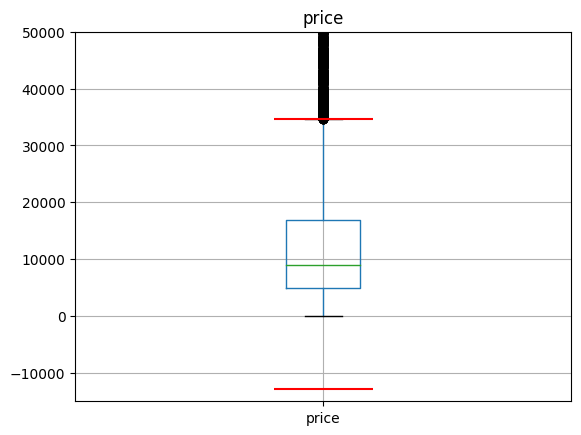

In [70]:
graph_boxplots(cars, 'price', y_axis=(-15000, 50000))

Por los gráficos de las líneas teóricas y la cercanía de la mediana hacia cero, notamos que los datos están fuertemente agrupados hacia el cero. Dicho de otra manera, más de la mitad de los valores de esta columna están entre 0 y 9000. Esto indica que hay demasiados valores cercanos al cero que están distorsionando nuestra distribución. 
<br>Por parte de los valores muy altos, en los histogramas habíamos notado que a partir de las 50 mil unidades monetarias los valores eran bastante escasos. Con el gráfico actual podemos delimitar y decidir que el límite máximo para esta distribución se acerca mucho más a las 40 mil unidades monetarias, el cual será el valor que tomemos como referencia.
<br>Profundizaremos un poco más sobre el comportamiento de esta columna en los valores cercanos al cero, graficando los histogramas en esa región en concreto:

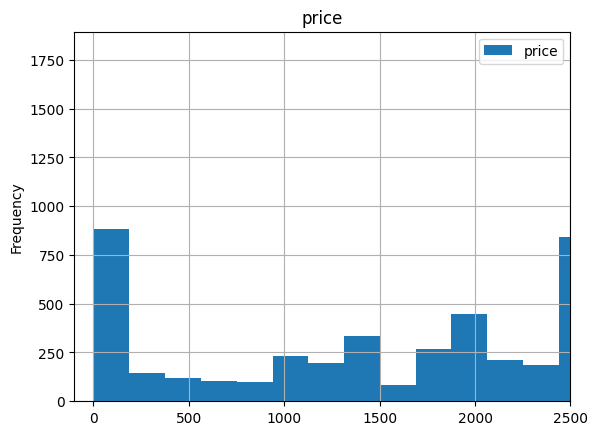

In [81]:
hist_cuantitative(cars, 'price', bins_number=2000, x_axis=(-100, 2500))

Notamos que hay alrededor de 900 valores que están agrupados en el primer `contenedor` de los histogramas, así como cierta cantidad de valores pequeños hasta los 1000. Esto nos lleva a pensar un poco; suponiendo que el precio esté medido en dólares (divisa común y con buen valor adquisitivo), es poco probable que un vehículo promedio o incluso deteriorado tenga un precio menor a 1000 dólares. De hecho, veremos la condición de los vehículos segmentando nuestra data para analizar si estos precios son reales o no:

In [84]:
cars.query('price < 1000')['condition'].value_counts()

3    983
1    185
2    106
4     95
0     28
5      7
Name: condition, dtype: int64

Resalta bastante el hecho de que la mayor parte de los vehículos con precio menor a 1000 dólares (unidades monetarias) tengan un estado clasificado como "excelente" (3="excellent"). Otra interpretación es que, en este segmento, la condición no está tan relacionada con el precio como uno esperaría. Entonces, sería razonable suponer que estos valores en realidad no son reales y que por alguna razón se les colocó un precio así. De hecho, este fenómeno es bastante frecuente en marketplaces de internet: vendedores que no ponen los precios de sus productos, ponen precios mínimos o muy elevados, con la intención de que el interesado se comunique directamente con el vendedor y quizá negociar el precio. Puede también ser debido a otras razones, pero requeriría un análisis exclusivo con el área relacionada, al cual no tenemos acceso. En este caso, cuantificaremos en términos porcentuales si estos valores que pretendemos eliminar son muy significativos o no.

<Axes: title={'center': 'price'}, xlabel='cylinders'>

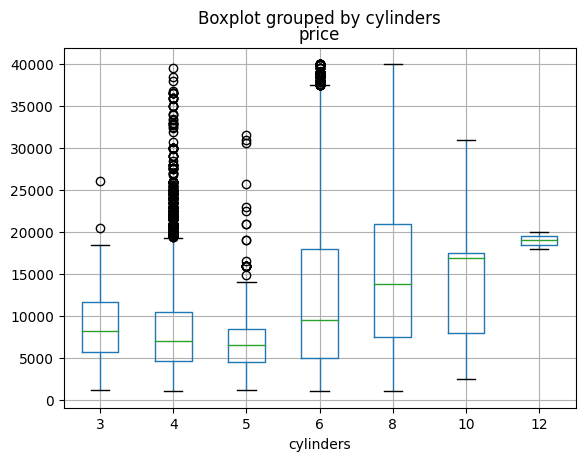

In [68]:
cars.query('1000 < price < 40000').boxplot(column='price', by='cylinders')

In [69]:
cars.query('price < 1000')['condition'].value_counts()

3    983
1    185
2    106
4     95
0     28
5      7
Name: condition, dtype: int64

In [48]:
# Determina los límites inferiores para valores atípicos



In [49]:
# Determinar los límites superiores para valores atípicos



In [50]:
# Almacena los datos sin valores atípicos en un DataFrame separado



## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

## Factores de precio

[¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color) traza gráficos de caja y bigotes y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.]

[Utiliza matriz de correlación y diagramas de correlación]

## Conclusión general

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]